Saving 9. Customer Segmentation in E-commerce.csv to 9. Customer Segmentation in E-commerce (1).csv


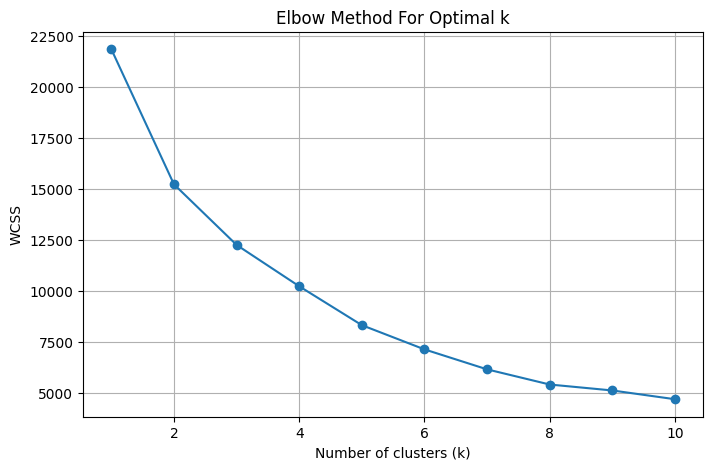

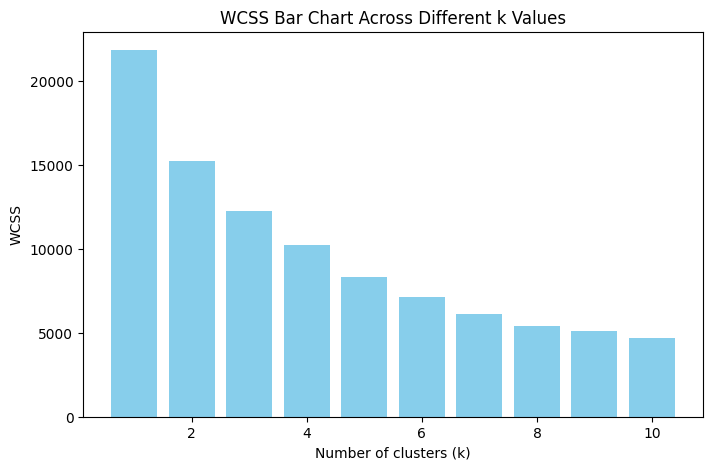

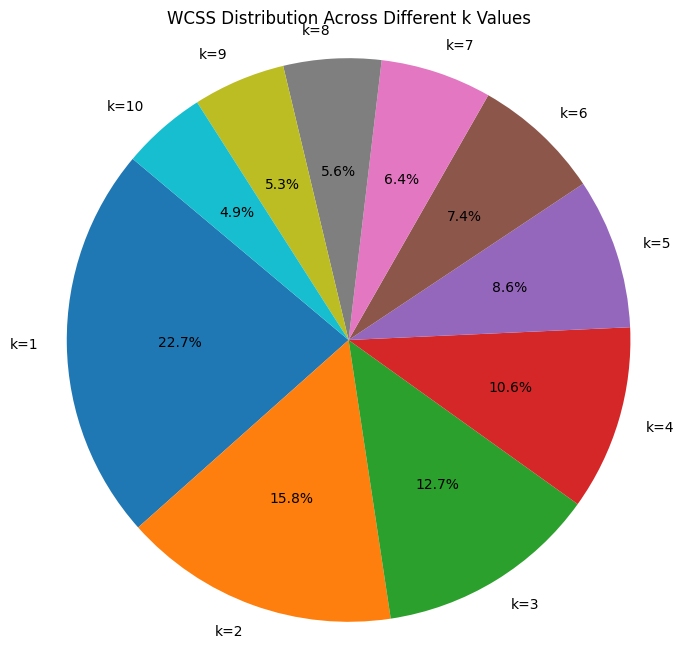

In [4]:
# Step 1: Upload and load dataset
from google.colab import files
import pandas as pd

uploaded = files.upload()
filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)

# Step 2: Preprocess data
# Remove rows with missing CustomerID and create a new 'TotalPrice' feature
df.dropna(subset=["CustomerID"], inplace=True)
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# Step 3: Aggregate customer-level features
# Summarize key metrics per customer
customer_df = df.groupby("CustomerID").agg({
    "InvoiceNo": "nunique",           # Number of unique purchases
    "Quantity": "sum",                # Total items bought
    "TotalPrice": "sum",              # Total amount spent
    "InvoiceDate": "count"            # Total transactions (row count)
}).rename(columns={
    "InvoiceNo": "NumPurchases",
    "Quantity": "TotalItems",
    "TotalPrice": "TotalSpent",
    "InvoiceDate": "TotalTransactions"
})

# Step 4: Add behavior metrics
# Calculating average basket size and average spend per purchase
customer_df["AvgBasketSize"] = customer_df["TotalItems"] / customer_df["NumPurchases"]
customer_df["AvgSpendPerPurchase"] = customer_df["TotalSpent"] / customer_df["NumPurchases"]

# Step 5: Normalize the data
from sklearn.preprocessing import StandardScaler

# Selecting the features for clustering
features = customer_df[["NumPurchases", "TotalItems", "TotalSpent", "AvgBasketSize", "AvgSpendPerPurchase"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Step 6: Apply the Elbow Method to decide optimal k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-Cluster-Sum-of-Squares (WCSS) list

# Loop over k-values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# --- Visualization 1: Elbow Line Plot ---
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# --- Visualization 2: Bar Chart of WCSS ---
plt.figure(figsize=(8, 5))
plt.bar(range(1, 11), wcss, color='skyblue')
plt.title('WCSS Bar Chart Across Different k Values')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

# --- Visualization 3: Pie Chart of WCSS Distribution ---
labels = [f'k={i}' for i in range(1, 11)]
plt.figure(figsize=(8, 8))
plt.pie(wcss, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("WCSS Distribution Across Different k Values")
plt.axis('equal')  # Equal aspect ratio ensures pie chart is a circle
plt.show()
